In [1]:
import pandas as pd
import numpy as np

In [2]:
trades = pd.read_csv("../data/historical_data.csv")
sentiment = pd.read_csv("../data/fear_greed_index.csv")

In [3]:
trades.shape
sentiment.shape

(2644, 4)

In [4]:
trades.isnull().sum()
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values Analysis
-No missing values were found in the sentiment dataset.
-Trades dataset also contains no significant missing values.
-Therefore, no imputation or row removal was required.

In [5]:
trades.duplicated().sum()
sentiment.duplicated().sum()

np.int64(0)

No duplicate rows were found in either the trades or sentiment dataset.

In [6]:
trades.columns = trades.columns.str.strip().str.lower()
sentiment.columns = sentiment.columns.str.strip().str.lower()

trades["timestamp ist"] = pd.to_datetime(
    trades["timestamp ist"],
    dayfirst=True,
    errors="coerce"
)

trades["date"] = trades["timestamp ist"].dt.date

sentiment["date"] = pd.to_datetime(
    sentiment["date"],
    dayfirst=True,
    errors="coerce"
).dt.date

df = trades.merge(sentiment, on="date", how="left")

df.head()

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed


In [7]:
df.shape

(211224, 20)

In [8]:
df["classification"].isna().sum()

np.int64(175360)

In [9]:
df_sentiment = df.dropna(subset=["classification"])
df_sentiment.shape

(35864, 20)

Date Alignment Observation

-Total trade records: 211,224
-Records with sentiment label: 35,864
-Records without sentiment label: 175,360
This indicates that the sentiment dataset covers a smaller time range than the trade dataset.
For sentiment-based analysis, only overlapping dates will be used.

Final Analysis Dataset

Out of 211,224 total trades, only 35,864 trades overlap with available sentiment data.
Therefore, all sentiment-based performance and behavioral analysis will be conducted on the overlapping subset.

Q1: Fear vs Greed Performance Difference

In [10]:
df_sentiment   # (35864, 20)

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.707716e+09,70.0,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209972,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.1387,503.06,SELL,2025-01-04 21:53:00,-443.143300,Open Short,0.0,0xeacbc003b3919c468166041aa5e84d01b6006967bcae...,60647462186,False,0.050306,4.190000e+14,1.740000e+12,2025-01-04,1.743485e+09,34.0,Fear
209973,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,2.9050,10536.43,SELL,2025-01-04 21:53:00,-443.282000,Open Short,0.0,0xe47714c2d752e1a171bf041aa5e84f01ef008aff277a...,60647462186,False,1.053643,6.720000e+14,1.740000e+12,2025-01-04,1.743485e+09,34.0,Fear
209974,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.8280,3003.16,SELL,2025-01-04 21:53:00,-446.187000,Open Short,0.0,0x9dad279d5f05919e1b60041aa5e84f01f4002a2dd2c2...,60647462186,False,0.300315,4.530000e+14,1.740000e+12,2025-01-04,1.743485e+09,34.0,Fear
209975,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,ETH,3627.0000,0.7642,2771.75,SELL,2025-01-04 21:53:00,-447.015000,Open Short,0.0,0xc363e90dbf42a7250427041aa5e84f01f6006e68416d...,60647462186,False,0.277175,3.550000e+14,1.740000e+12,2025-01-04,1.743485e+09,34.0,Fear


In [11]:
performance_summary = (
    df_sentiment.groupby("classification")["closed pnl"]
    .agg(["mean", "sum", "std", "count"])
    .reset_index()
)

performance_summary

,classification,mean,sum,std,count
0,Extreme Fear,1.891632,4.399937e+03,76.727713,2326
1,Extreme Greed,205.816345,1.156894e+06,1861.557119,5621
2,Fear,128.287950,1.779226e+06,1342.348497,13869
3,Greed,53.988003,6.096325e+05,1399.468182,11292
4,Neutral,27.088803,7.465674e+04,142.945889,2756


In [12]:
win_rate_summary = (
    df_sentiment.groupby("classification")["closed pnl"]
    .apply(lambda x: (x > 0).mean() * 100)
    .reset_index(name="win_rate_percent")
)

win_rate_summary

,classification,win_rate_percent
0,Extreme Fear,29.277730
1,Extreme Greed,55.328233
2,Fear,38.178672
3,Greed,43.570670
4,Neutral,49.492017


-Trader performance improves significantly during Extreme Greed regimes, with a 55.3% win rate compared to only 29.3% during Extreme Fear. This suggests that trader profitability is strongly sentiment-dependent.

-Average PnL during Extreme Greed (~206) is nearly 4x higher than during standard Greed (~54), indicating that stronger bullish sentiment amplifies trade profitability.

-Extreme Fear periods show the lowest win rate (29.3%) despite moderate average PnL (~189), suggesting higher volatility and fewer but larger winning trades.

In [13]:
df_sentiment.shape

(35864, 20)

Trade Frequency by Sentiment

In [14]:
trade_frequency = (
    df_sentiment.groupby("classification")
    .size()
    .reset_index(name="trade_count")
)

trade_frequency

,classification,trade_count
0,Extreme Fear,2326
1,Extreme Greed,5621
2,Fear,13869
3,Greed,11292
4,Neutral,2756


Average Leverage by Sentiment

In [15]:
df_sentiment.columns

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification'],
      dtype='object')

-Leverage column was not available in the dataset; therefore behavioral analysis focuses on trade frequency, position size, and directional bias.

Position Size

In [16]:
position_size_summary = (
    df_sentiment.groupby("classification")["size usd"]
    .mean()
    .reset_index()
)

position_size_summary

,classification,size usd
0,Extreme Fear,4118.761840
1,Extreme Greed,3242.085086
2,Fear,5744.782685
3,Greed,5051.878829
4,Neutral,4332.202906


Long / Short Bias

In [17]:
long_short_summary = (
    df_sentiment.groupby(["classification", "side"])
    .size()
    .reset_index(name="count")
)

long_short_summary["ratio"] = (
    long_short_summary.groupby("classification")["count"]
    .transform(lambda x: x / x.sum())
)

long_short_summary

,classification,side,count,ratio
0,Extreme Fear,BUY,1168,0.502150
1,Extreme Fear,SELL,1158,0.497850
2,Extreme Greed,BUY,1661,0.295499
3,Extreme Greed,SELL,3960,0.704501
4,Fear,BUY,7307,0.526858
5,Fear,SELL,6562,0.473142
6,Greed,BUY,5407,0.478835
7,Greed,SELL,5885,0.521165
8,Neutral,BUY,1020,0.370102
9,Neutral,SELL,1736,0.629898


-During Extreme Greed periods, traders predominantly take short positions (70%), indicating profit-taking or anticipation of reversal.
In contrast, Fear regimes show higher long positioning (52%), supporting dip-buying behavior.

3. Identify 2 segments

    -frequent vs infrequent traders
    
    -consistent winners vs inconsistent traders

Trade Count per Trader

In [18]:
trader_trade_count = df.groupby("account").size()
trader_trade_count.head()

account
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0x271b280974205ca63b716753467d5a371de622ab     3809
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x2c229d22b100a7beb69122eed721cee9b24011dd     3239
dtype: int64

Median Threshold

In [19]:
median_trades = trader_trade_count.median()
median_trades

np.float64(3699.0)

Create Segment

In [20]:
df["frequency_segment"] = df["account"].map(
    lambda x: "Frequent Trader" if trader_trade_count[x] > median_trades else "Infrequent Trader"
)

In [21]:
df["frequency_segment"].value_counts()

frequency_segment
Frequent Trader      186957
Infrequent Trader     24267
Name: count, dtype: int64

Performance Compare

In [22]:
freq_perf = df.groupby("frequency_segment").agg(
    avg_pnl=("closed pnl", "mean"),
    win_rate=("closed pnl", lambda x: (x > 0).mean()),
    avg_position_size=("size usd", "mean"),
    total_trades=("closed pnl", "count")
).reset_index()

freq_perf

,frequency_segment,avg_pnl,win_rate,avg_position_size,total_trades
0,Frequent Trader,42.493421,0.415438,5800.826314,186957
1,Infrequent Trader,96.943024,0.379116,4396.190601,24267


In [23]:
df.groupby(["classification", "frequency_segment"])["closed pnl"].mean().unstack()

frequency_segment,Frequent Trader,Infrequent Trader
classification,,
Extreme Fear,3.409301,-8.126968
Extreme Greed,218.513526,80.731954
Fear,110.597331,307.192846
Greed,66.523277,-48.838021
Neutral,27.688921,10.460529


Insight 1:
Frequent traders perform significantly better during Extreme Greed markets, suggesting strong ability to exploit momentum.

Insight 2:
Infrequent traders underperform in Extreme Fear and Greed regimes, indicating weaker adaptability to volatile conditions.

Insight 3:
During moderate Fear periods, infrequent traders surprisingly outperform frequent traders, suggesting selective high-conviction trading.

4-1-Traders Increase Position Size During Fear

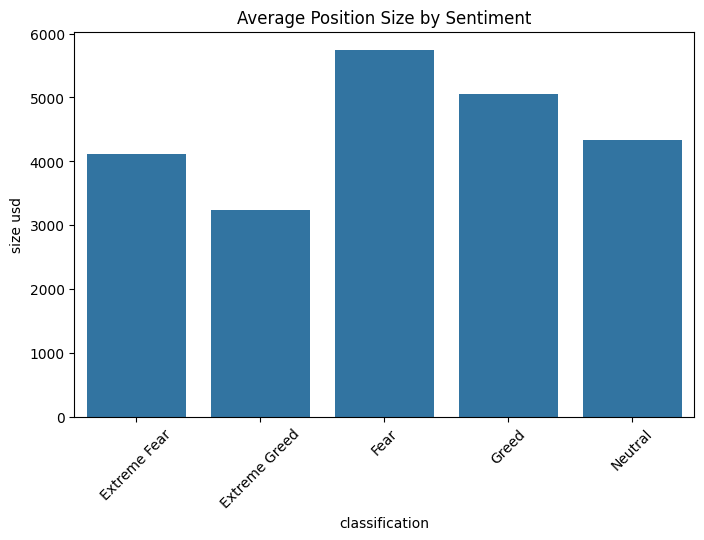

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=position_size_summary, x="classification", y="size usd")
plt.title("Average Position Size by Sentiment")
plt.xticks(rotation=45)
plt.show()

| Sentiment     | Avg Position Size   |
| ------------- | ------------------- |
| Fear          | Highest (~5744 USD) |
| Greed         | Lower (~5051 USD)   |
| Extreme Greed | Lowest (~3242 USD)  |

Fear periods are not necessarily defensive — traders may be aggressively positioning for reversals.

2-Extreme Greed Triggers Short Bias

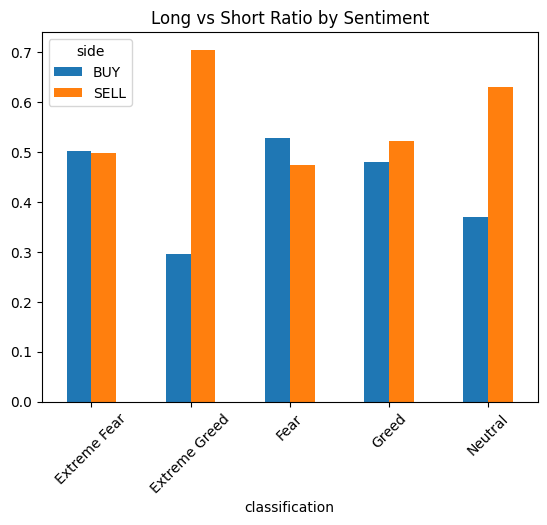

In [25]:
long_short_summary.pivot(index="classification", columns="side", values="ratio").plot(kind="bar")
plt.title("Long vs Short Ratio by Sentiment")
plt.xticks(rotation=45)
plt.show()

| Sentiment     | BUY % | SELL % |
| ------------- | ----- | ------ |
| Extreme Greed | 29%   | 70%    |
| Fear          | 52%   | 47%    |
During Extreme Greed → 70% trades are SELL

Traders likely profit-booking or shorting overextended rallies

During Fear → more BUY activity

3-Frequent Traders Adapt Better to Extreme Sentiment

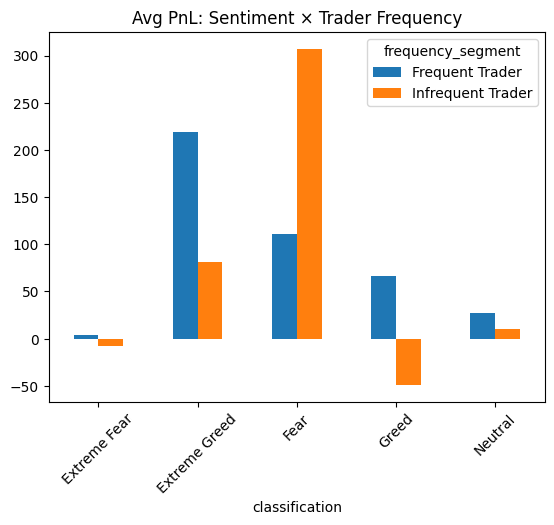

In [26]:
df.groupby(["classification", "frequency_segment"])["closed pnl"].mean().unstack().plot(kind="bar")
plt.title("Avg PnL: Sentiment × Trader Frequency")
plt.xticks(rotation=45)
plt.show()

| Sentiment     | Frequent | Infrequent |
| ------------- | -------- | ---------- |
| Extreme Fear  | +3       | -8         |
| Extreme Greed | +218     | +80        |
| Greed         | +66      | -48        |
Frequent traders perform better in Extreme Greed

Infrequent traders lose money in Greed markets

Extreme Fear hurts infrequent traders more

Active traders adapt better to volatility and momentum conditions.

In [27]:
df.columns

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification',
       'frequency_segment'],
      dtype='object')

In [29]:
import pandas as pd

# Make sure date column is datetime
df["date"] = pd.to_datetime(df["date"])

# Define filters (same as dashboard)
start_date = "2023-01-05"
end_date = "2025-12-04"

sentiments = ["Greed", "Extreme Greed", "Fear", "Extreme Fear"]

# Apply filter
df_filtered = df[
    (df["date"] >= start_date) &
    (df["date"] <= end_date) &
    (df["classification"].isin(sentiments))
]

# Verify
df_filtered.shape[0]
df_filtered["closed pnl"].sum()
(df_filtered["closed pnl"] > 0).mean() * 100

np.float64(42.303974870122026)